# Our Measures vs Plate Reader EXP GALICIA
* This exercise should help us decide which 'pocillos' to consider, and which to discard.
* We use data from *Aigua Pesc* and *Exp Gal*

In [1]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageproc import get_pocillos, complete_the_grid, draw_circles, array_from_pic, circle_crop

## Absorbancia

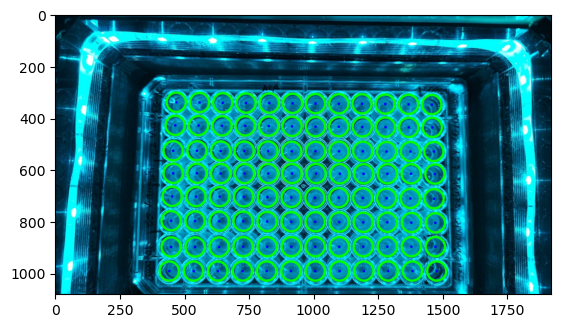

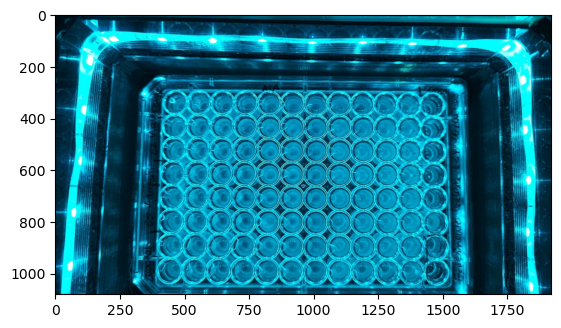

In [2]:
img_path ='/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_11:19:14 EXP GALICIA/PLATE1/Picture_Patogen_10M5_#1_2023-05-12_11:22:45_P1_Cam2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)

plt.imshow(img)

### Our measure

In [3]:
grid_positions = new_circles[:,3:5]
mean_output_array = np.zeros((8,12))
for i, position in enumerate(grid_positions):
        cropped_pocillo = circle_crop(img, new_circles[i,0:3])
        cropped_pocillo_blue = cropped_pocillo[:,:,2]
        mean_output_array[position[0], position[1]] = np.mean(cropped_pocillo_blue[cropped_pocillo_blue != 0])

### Plate reader

In [4]:
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_11:19:14 EXP GALICIA/Copy of 6mL_6tipsC2_3mL_6tipsC5_10052023_t24.xlsx').iloc[3:11,2:14].values.astype(float)
pd.DataFrame(readings)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.8244,0.5983,0.6322,0.5206,0.8587,0.8842,0.6606,0.9219,0.5690,0.6570,0.6582,0.1237
1,0.8690,0.5446,0.6734,0.5927,0.9000,0.9414,0.6102,0.9423,0.5636,0.5494,0.5943,0.1283
2,0.8631,0.5147,0.5764,0.5099,0.9195,0.8121,0.6352,0.9379,0.6306,0.6142,0.6030,0.1375
3,0.8812,0.5276,0.6184,0.5292,0.8940,0.9704,0.6360,1.0091,0.8559,0.6135,0.6112,0.1184
4,0.9672,0.5805,0.5885,0.5546,0.9392,0.9322,0.7470,0.9003,0.5630,0.6213,0.6326,0.1452
5,0.8546,0.4896,0.6032,0.5940,0.9206,0.9280,0.6040,0.9152,0.5650,0.5781,0.6192,0.7540
6,0.8890,0.5887,0.6132,0.5717,0.9177,0.8064,0.5495,1.0531,0.5531,0.6101,0.6044,0.1269
7,0.8637,0.5632,0.5701,0.6038,0.9056,0.9664,0.5266,0.8379,0.4762,0.5067,0.6170,0.0692


### Comparing
* Orange = our measure
* Blue = reading

Row  1


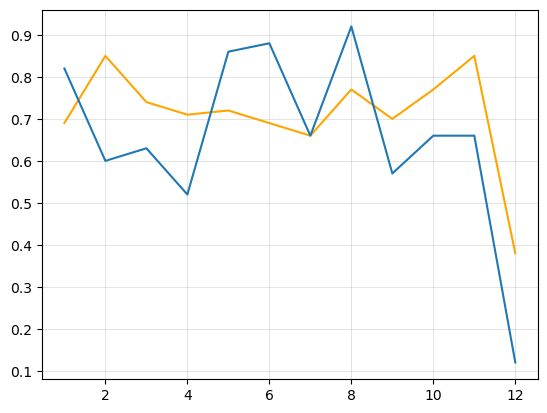

Row  2


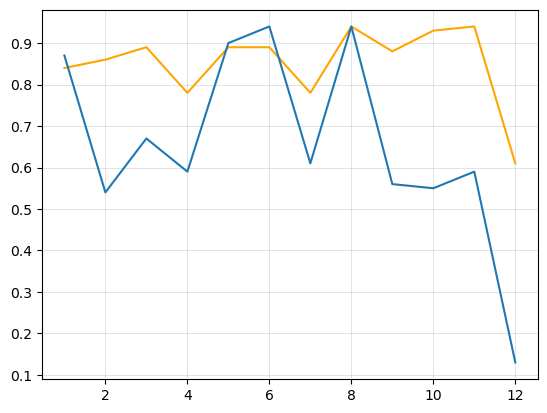

Row  3


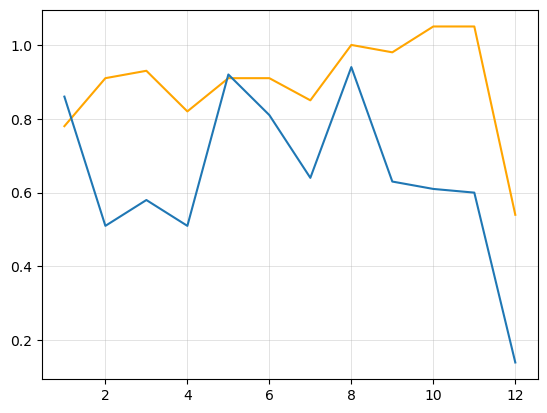

Row  4


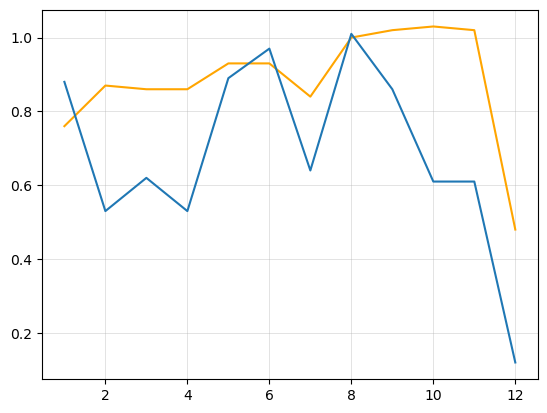

Row  5


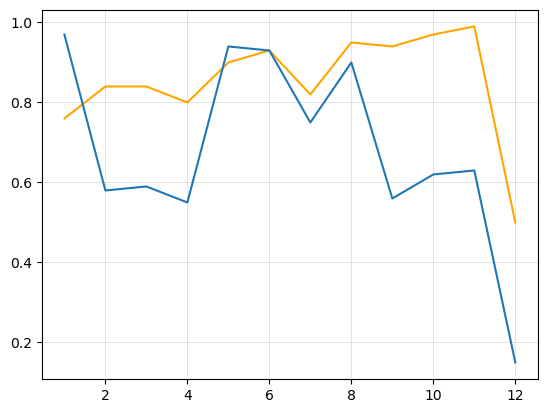

Row  6


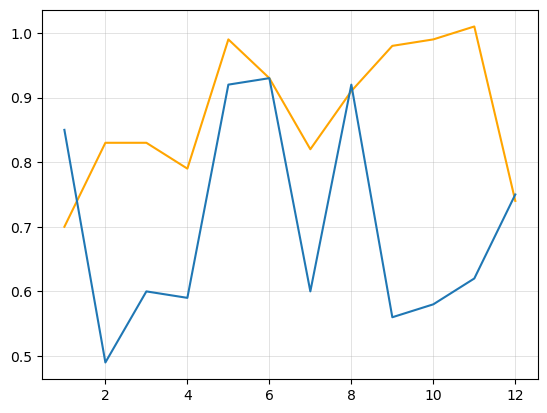

Row  7


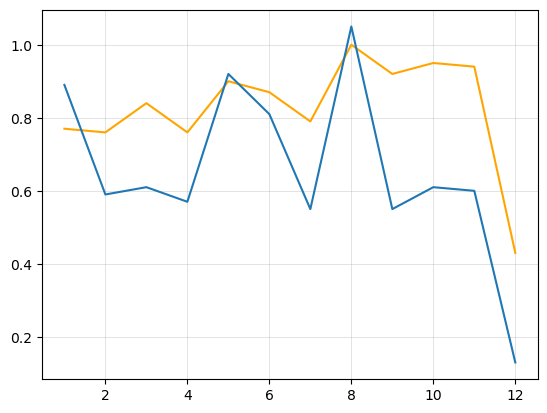

Row  8


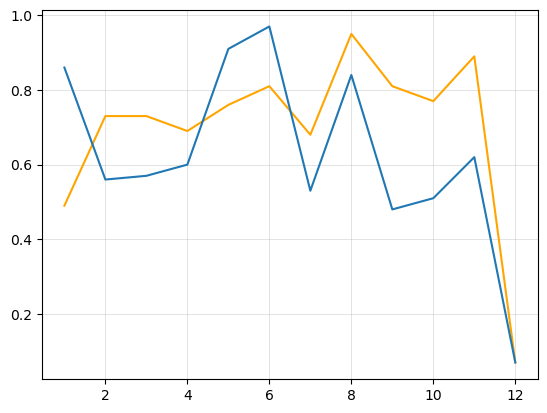

In [5]:
# Linear scaling to fit max/min range of the readings
x = mean_output_array
a, b = readings.min(), readings.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)
readings = np.round(readings,2)

# Plot results row by row
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,13), x_norm[i,:], "orange")
    plt.plot(np.arange(1,13), readings[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [6]:
np.mean(readings-x_norm)

-0.1601041666666667

#### Little experiment 1: Remove first and last columns

In [7]:
readings1 = np.round(readings,2)[:, 1:11]

In [8]:
# Linear scaling to fit max/min range of the readings
x = mean_output_array[:, 1:-1]
a, b = readings1.min(), readings1.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)

Row  1


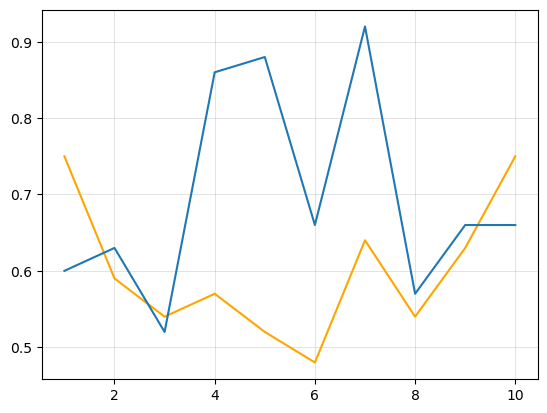

Row  2


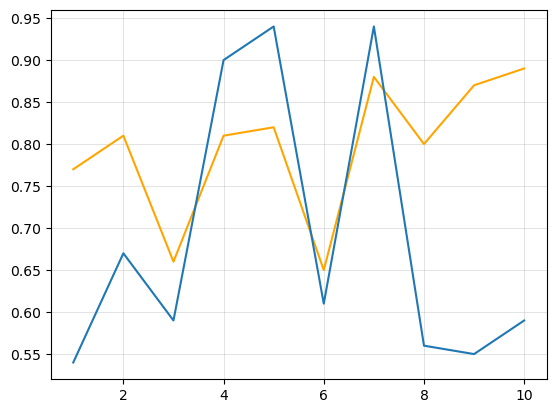

Row  3


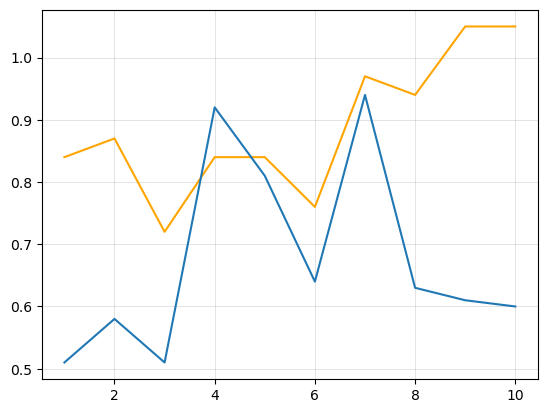

Row  4


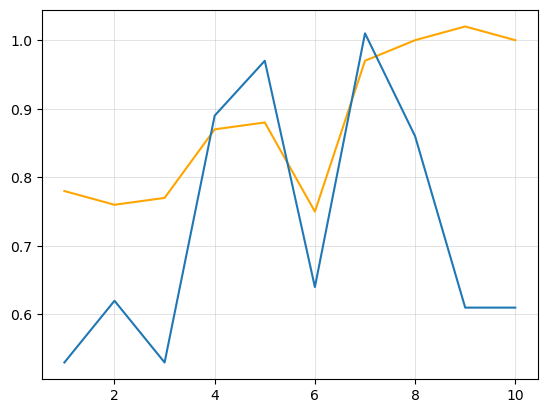

Row  5


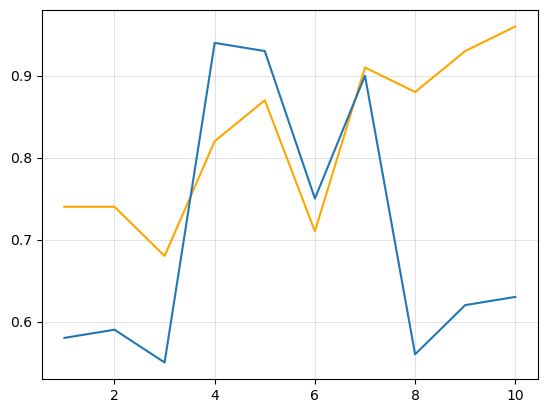

Row  6


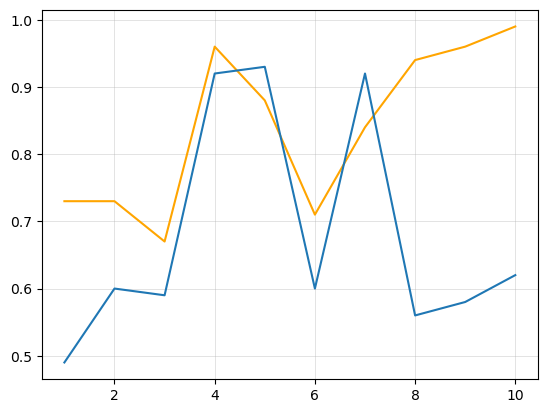

Row  7


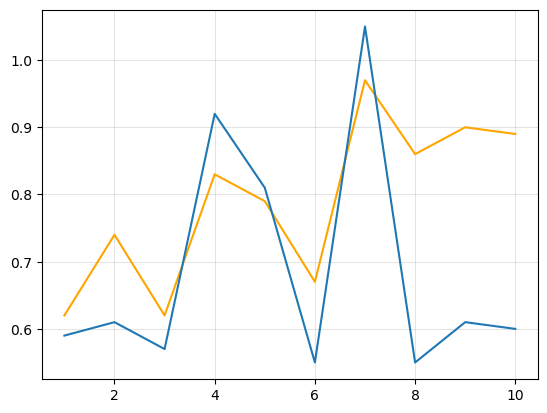

Row  8


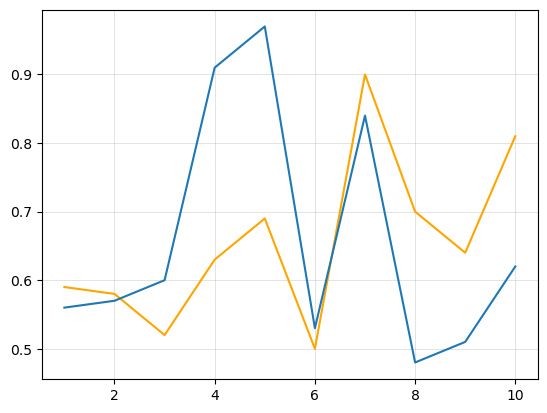

In [9]:
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,11), x_norm[i,:], "orange")
    plt.plot(np.arange(1,11), readings1[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [10]:
np.mean(readings1-x_norm)

-0.094625

#### Little experiment 2: Remove first and last columns & rows

In [11]:
readings2 = np.round(readings,2)[1:7, 1:11]
x = mean_output_array[1:7, 1:-1]
a, b = readings2.min(), readings2.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)

Row  2


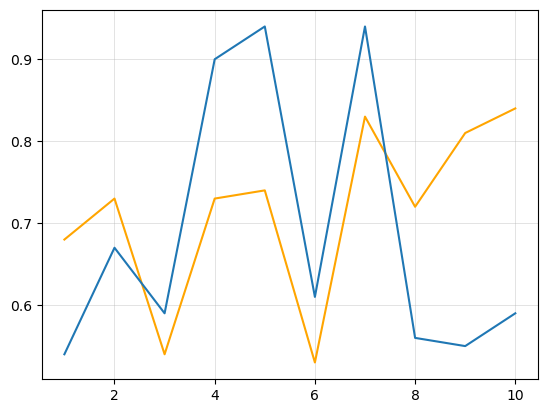

Row  3


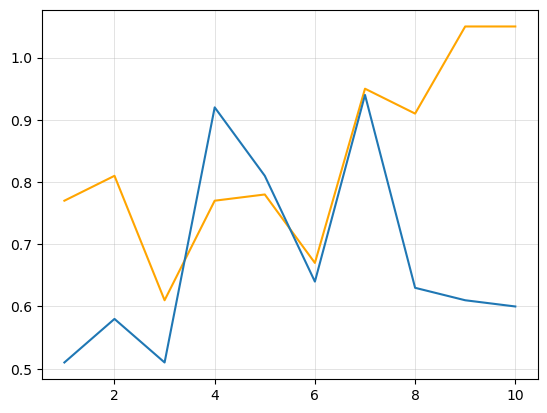

Row  4


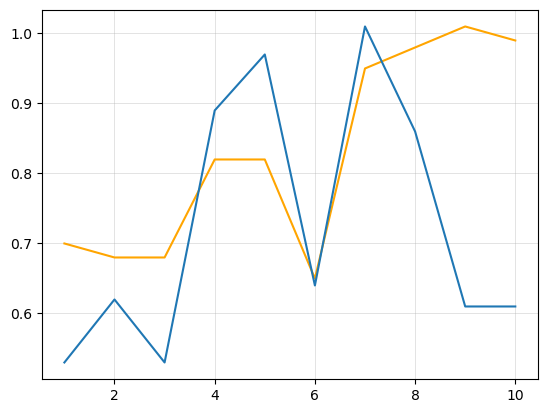

Row  5


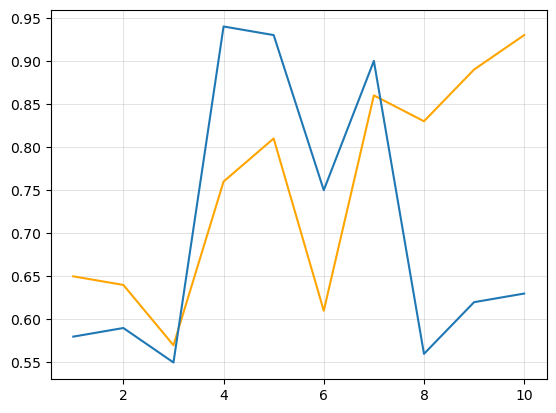

Row  6


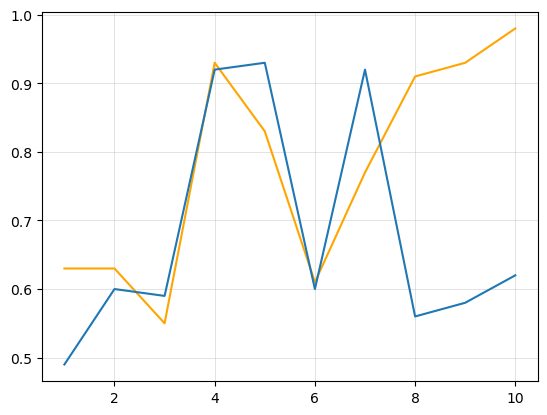

Row  7


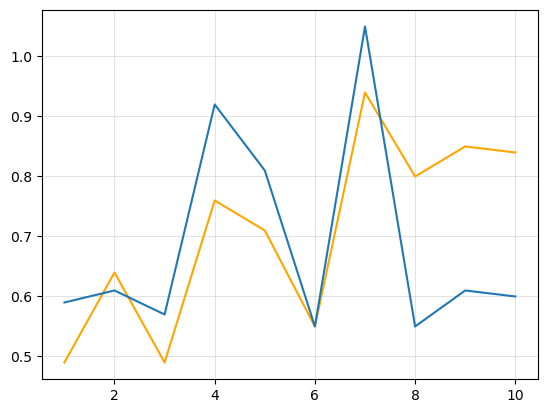

In [12]:
for i in range(6):   
    print("Row ", i+2)
    plt.plot(np.arange(1,11), x_norm[i,:], "orange")
    plt.plot(np.arange(1,11), readings2[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [13]:
np.mean(readings2-x_norm), np.mean(readings2-x_norm)/np.mean(readings2)

(-0.07600000000000001, -0.10953639202498199)

## Fluorescència

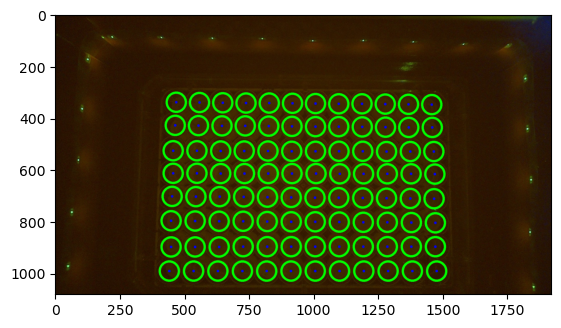

In [14]:
img_path = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_11:19:14 EXP GALICIA/PLATE1/Picture_Patogen_10M5_#1_2023-05-12_11:22:44_P1_Cam1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
draw_circles(img, new_circles)

In [15]:
grid_positions = new_circles[:,3:5]
q9_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
        cropped_pocillo = circle_crop(img, new_circles[i,0:3])
        cropped_pocillo_green = cropped_pocillo[:,:,1]
        q9_output_array[position[0], position[1]] = np.percentile(cropped_pocillo_green[cropped_pocillo_green != 0], 90).astype(int)        
        
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_11:19:14 EXP GALICIA/Copy of 6mL_6tipsC2_3mL_6tipsC5_10052023_t24.xlsx').iloc[24:32,2:14].values.astype(int)
pd.DataFrame(readings)

,0,1,2,3,4,5,6,7,8,9,10,11
0,12173599,19874796,16980770,19563770,22440144,12956352,14925173,17576032,15506512,11978305,15450383,9373599
1,15838166,22172622,24412760,25863836,25883664,15651067,14854681,16962240,18301694,16636441,16719548,8430506
2,14466002,21116118,16525748,21516008,24539604,8941587,15815961,15270961,15178809,18355780,14201536,10315748
3,14175353,20983754,18891362,23263230,25612056,13554494,17606968,14823691,15966142,18468386,17096516,8749673
4,17135386,19857024,19793378,22248256,26084488,16096686,12664166,15469361,16201234,15878914,17795746,9946122
5,12395218,20546116,17226854,23120096,25848336,14136438,15136055,4685146,16755738,15720973,17443376,8927788
6,13861370,19581686,16655455,22316540,26217210,11835805,14721262,13255434,17443924,17359614,19078446,8972800
7,8879163,12400130,12406391,16490972,22128346,14195414,11493515,11734348,12114865,6748589,12766001,157146


Row  1


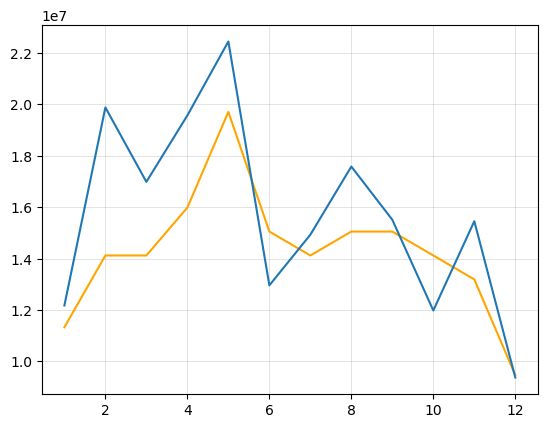

Row  2


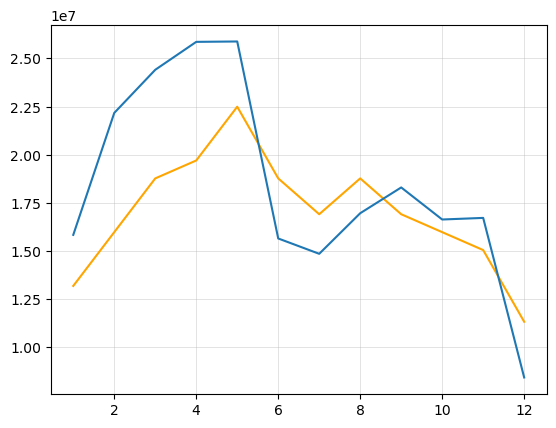

Row  3


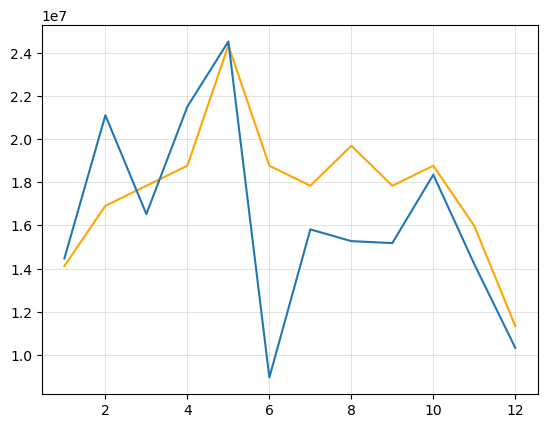

Row  4


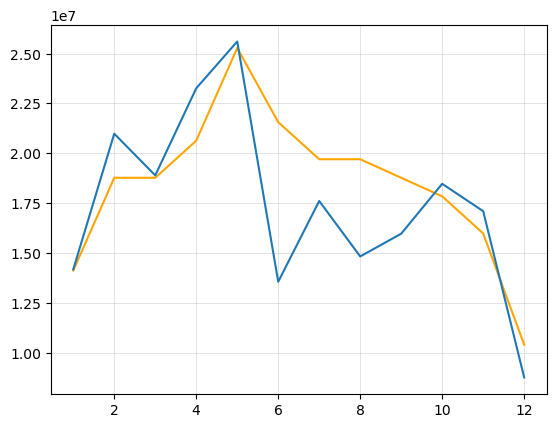

Row  5


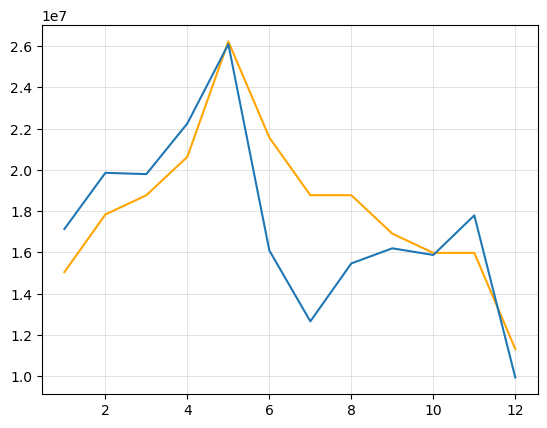

Row  6


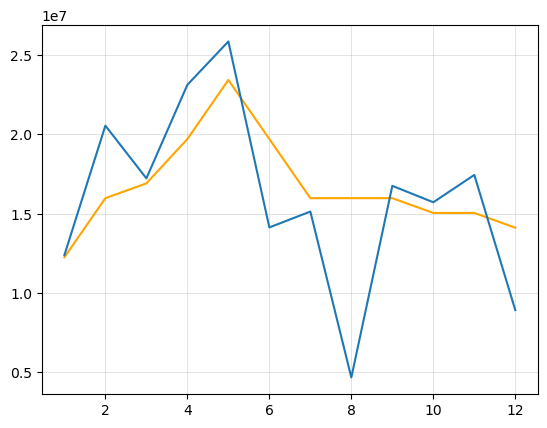

Row  7


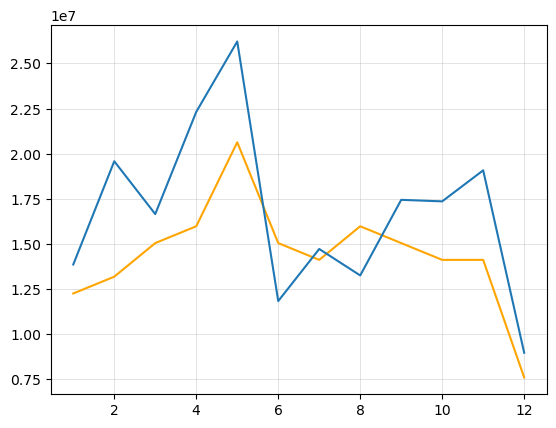

Row  8


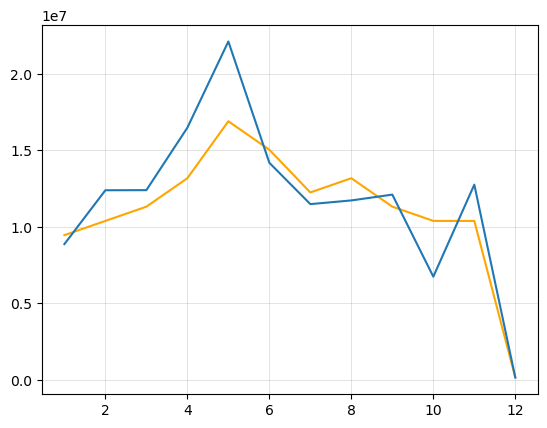

In [16]:
# Linear scaling to fit max/min range of the readings
x = q9_output_array
a, b = readings.min(), readings.max()
x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a
x_norm = np.round(x_norm, 2)
readings = np.round(readings,2)

# Plot results row by row
for i in range(8):   
    print("Row ", i+1)
    plt.plot(np.arange(1,13), x_norm[i,:], "orange")
    plt.plot(np.arange(1,13), readings[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

In [17]:
np.mean(readings-x_norm)/np.mean(readings)

0.016587077469773642